# Описание проекта

Имеются данные о продажах компьютерных игр - доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Стоит цель исследовать рынок компьютерных игр и сделать выводы. В рамках цели выделяем следдущие задачи: 1) Обработка данных; 2) Анализ продаж в динамике; 2) Анализ продаж в разрезе платформ; выявление преспективных платформ; 3)Исследование на корреляцию между оценками и продажами; 4) Составление портретов пользователей по регионам продаж; 4) Проверка статистических гипотех о равенстве оценок по разным группам игроков


# Шаг 1. Изучение общей информации

In [1]:
# Импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings

In [2]:
# Создаем исходный датафрейм
df = pd.read_csv('/datasets/games.csv')
# Посмотрим, что он из себя представляет
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15032,Road Trip: The Arcade Edition,GC,2002.0,Racing,0.02,0.00,0.00,0.00,NaN,tbd,E
6903,PGA Tour 96,PS,1995.0,Sports,0.13,0.09,0.00,0.02,NaN,NaN,NaN
7388,Order Up!,Wii,2008.0,Misc,0.19,0.01,0.00,0.02,NaN,NaN,NaN
11040,Disgaea Infinite,PSP,2010.0,Adventure,0.07,0.00,0.01,0.01,64.0,4.4,T
4364,Wolfenstein: The New Order,PC,2014.0,Shooter,0.13,0.29,0.00,0.03,81.0,8.2,M
10228,Alias,PS2,2004.0,Action,0.05,0.04,0.00,0.01,64.0,8,T
8257,NHL 2K9,X360,2008.0,Sports,0.15,0.01,0.00,0.01,69.0,6.7,E10+
13282,Capcom vs. SNK: Millennium Fight 2000 Pro,DC,2001.0,Fighting,0.00,0.00,0.05,0.00,NaN,NaN,NaN
687,Chrono Trigger,SNES,1995.0,Role-Playing,0.28,0.00,2.02,0.01,NaN,NaN,NaN
9676,Diner Dash: Sizzle & Serve,PSP,2007.0,Puzzle,0.11,0.00,0.00,0.01,NaN,NaN,NaN


<!--  --> В датафрейме содержится следующая информация:
<ol>
<li>Name — название игры</li>
<li>Platform — платформа</li>
<li>Year_of_Release — год выпуска</li>
<li>Genre — жанр игры</li>
<li>NA_sales — продажи в Северной Америке (миллионы проданных копий)</li>
<li>EU_sales — продажи в Европе (миллионы проданных копий)</li>
<li>JP_sales — продажи в Японии (миллионы проданных копий)</li>
<li>Other_sales — продажи в других странах (миллионы проданных копий)</li>
<li>Critic_Score — оценка критиков (максимум 100)</li>
<li>User_Score — оценка пользователей (максимум 10)</li>
<li>Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.</li>
</ol>

In [3]:
df.info()
# Итого в данных содержится 16713 строк и 11 столбцов. 
# Имеются пропуски по столбцам с оценкой критиков и пользователей, также пропуски имеются по столбу с рейтингом и году релиза
# В двух строках пропущено имя и жанр

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()
# В данных содержиться информация с 1980 по 2016 год

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# Шаг 2. Подготовка данных

In [5]:
# Приводим названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
# Посмотрим на пропуски
df.isnull().sum()
# В данных большое количество пропусков
# Обработаем по порядку

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
# Всего 2 строки с пропусками в названии - вероятно появились из-за простой ошибки
df.loc[(df['name'].isnull())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
# вообще непонятно, что это за игры - удалим их
df = df.drop(df[df['name'].isnull()].index)

In [9]:
# Посмотрим на пропуски по году релиза
df.loc[(df['year_of_release'].isnull())]
# В принципе таких строк не много. Они могли возникнуть также из-за каких-то технических ошибок
# Или из-за неопределенности года (может игра в разных странах вышла в разные года)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
# Год релиза нельзя заменить средним
# Пробовала заменить условным значение, но потом оно портит графики и его все равно надо убирать
# В принципе не так много строк. Удалим и их
df = df.drop(df[df['year_of_release'].isnull()].index)

In [11]:
# Пропуски в оценке критиков
df.loc[(df['critic_score'].isnull())]
# Таких пропусков слишком много. Заменять средним тоже не слишком логично
# Может это неизвестные игры и критики их не оценивали

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
# Посмотрим как можно заменить
# Для начала посмотрим какие оценки вообще возможны
df['critic_score'].unique()
# Оценки - двузначные цифры не меньше 13

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [13]:
# Заменим на условное значение
df['critic_score'] = df['critic_score'].fillna(0)
# Главное учитывать это в дальнейшем анализе

In [14]:
# Пропуски в оценке игроков
df.loc[(df['user_score'].isnull())]
# Так же предполагаю, что либо игра неизвестная и ее мало оценивают, либо игра старая и для нее не было оценивания

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,0.0,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,0.0,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,NaN,NaN


In [15]:
# Посмотрим как можно заменить
# Для начала посмотрим какие оценки вообще возможны
df['user_score'].unique()
# Видим tbd - To Be Determined - будет определено - по чути это тежи пропуски

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
# Заменяем tbd на пропуски
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

In [17]:
# Заменим на условное значение
df['user_score'] = df['user_score'].fillna(0)
# Главное учитывать это в дальнейшем анализе

In [18]:
# Пропуски в рейтинге
df.loc[(df['rating'].isnull())]
# Их также большое количество. Может рейтинг не проставлен, не определен или в старых играх его и не должно было быть

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,0.0,0,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,0.0,0,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,0,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,0,NaN


In [19]:
# Посмотрим все возможные варианты
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [20]:
# Заменим на unknown
df['rating'] = df['rating'].fillna('unknown')

In [21]:
# Приведем столбцы к корекктным форматам,где это необходимо:
# год - может быть только целое число
# оценка критика - только целое число
# оценка игроков может быть дробной
df['year_of_release'] = df['year_of_release'].astype('int')
df['critic_score'] = df['critic_score'].astype('int')
df['user_score'] = df['user_score'].astype('float')
# Для уменьшения объема хранения
df['rating'] = df['rating'].astype('category')
df['genre'] = df['genre'].astype('category')
df['platform'] = df['platform'].astype('category')

In [22]:
# Добавим столбец с суммарным количеством проданных копий
df['all_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.0,unknown,0.01


In [23]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null category
year_of_release    16444 non-null int64
genre              16444 non-null category
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null int64
user_score         16444 non-null float64
rating             16444 non-null category
all_sales          16444 non-null float64
dtypes: category(3), float64(6), int64(2), object(1)
memory usage: 2.5 MB


# Шаг 3. Исследовательский анализ данных

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Text(0.5, 1.0, 'Число выпущенных игр по годам')

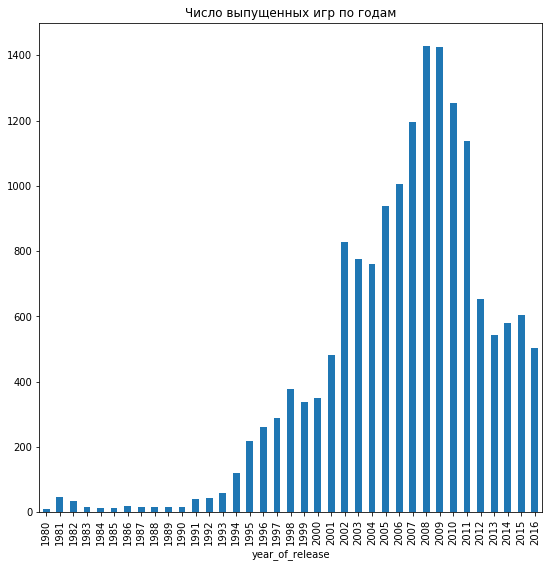

In [24]:
# Для того что бы посмотреть динамику выпуска игр сгруппируем их по годам
df.groupby('year_of_release')['name'].count().plot(kind='bar',figsize = (9, 9))
plt.title('Число выпущенных игр по годам')

По графику видно, что до девяностых годов объем игр был незначительным. Потом произошел рост, но с 2008 года объем игр каждый год снижался. Фактически данные до 1991 года особой информации не несут. Вероятно росто производства связан с развитием техники, мощностей компьютеров и приставок. Снижение может быть связано с ростом популярности онлайн-игр или мобильных игр, и как следствием, снижением продаж компьютерных игр.

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Наверное, количество игр все-таки не самый лучший показатель. Раз мы говорим о продажах логично судить о играх по их суммарным продажам 

Text(0.5, 1.0, 'Суммарные продажи игр по годам')

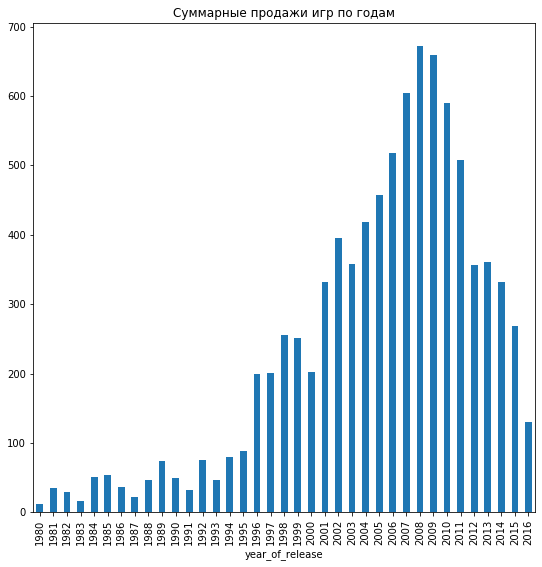

In [25]:
# График отражает ровно ту же тенденцию, что уже описывалась выше
df.groupby('year_of_release')['all_sales'].sum().plot(kind='bar',figsize = (9, 9))
plt.title('Суммарные продажи игр по годам')

Посмотрим как менялись продажи по платформам

Text(0.5, 1.0, 'Суммарные продажи игр по платформам')

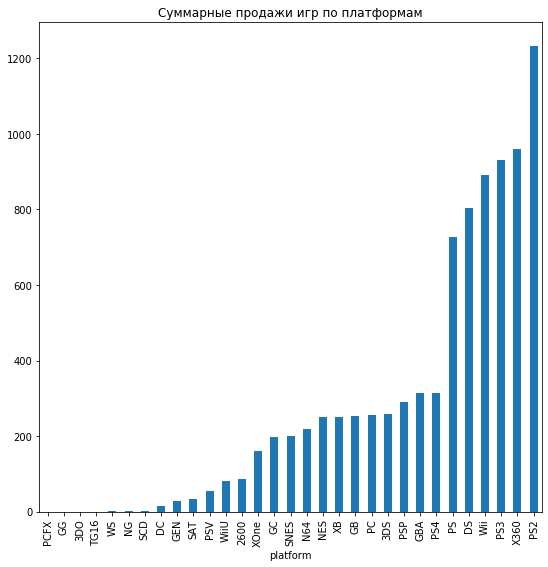

In [26]:
# Посмотрим для начала продажи по платформам за весь период
df.groupby('platform')['all_sales'].sum().sort_values().plot(kind='bar',figsize = (9, 9))
# Самые популярные платформы - PS2, X360, PS3
plt.title('Суммарные продажи игр по платформам')

In [27]:
# Первые шесть платформ визуально выделяются на фоне остальных
# Построим по ним распределение по годам
# Для начала сам список с платформами 
the_most_platforms = ['PS2','X360','PS3','Wii','DS','PS']
# Отфильтрцем по списку
df_for_lines = df.loc[df['platform'].isin(the_most_platforms)]

Text(0.5, 1.0, 'Суммарные продажи игр по годам в разрезе платформ')

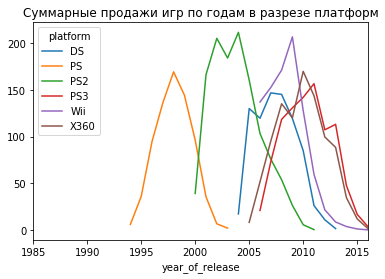

In [28]:
# Собирем с помощью сводной таблицы и визуализируем ее
df_for_lines.pivot_table(index = 'year_of_release', values = 'all_sales', columns = 'platform',aggfunc='sum').plot()
plt.title('Суммарные продажи игр по годам в разрезе платформ')

По графику видно как каждая платформа росла и теряла в популярности. В среднем около 10 лет занимает появление, развитие и снижение популярности платформы

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Отфильтруем данные по актуальности. За актуальный период берем данные с 2013 по 2016 гг, что взять только самую актуальную информацию и достоверно сделать прогноз

In [29]:
# Создаем актуальный датафрейм
df2 = df.loc[df['year_of_release']>2012]
df2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0.0,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0,0.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,unknown,0.01


Text(0.5, 1.0, 'Суммарные продажи игр по платформам, актуальный период')

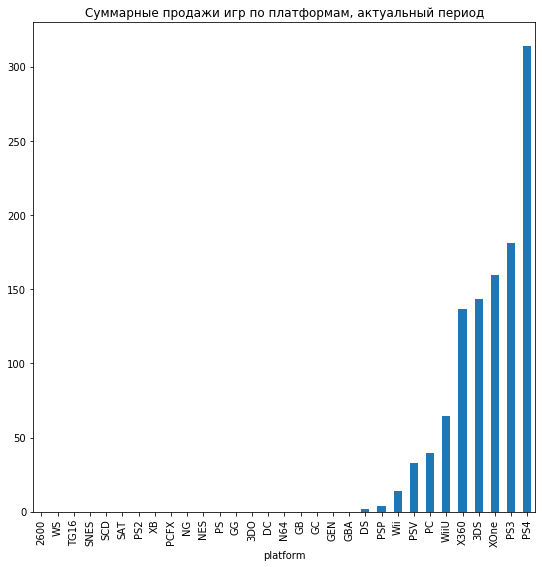

In [30]:
# Посмотрим продажи по платформам за актуальный период
df2.groupby('platform')['all_sales'].sum().sort_values().plot(kind='bar',figsize = (9, 9))
# Распределение среди платформ изменилось. Теперь самая прибыльная платформа - X360
plt.title('Суммарные продажи игр по платформам, актуальный период')

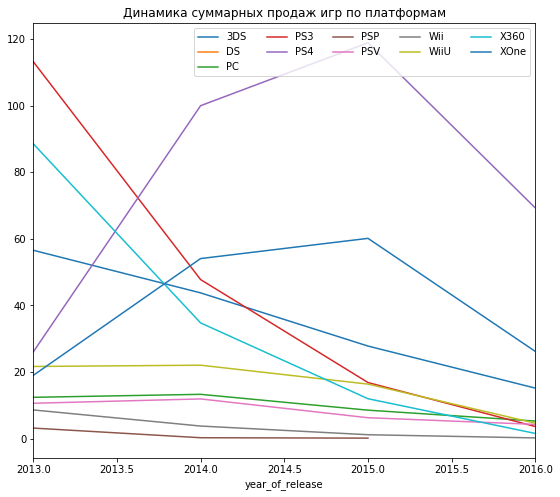

In [31]:
# Необходимо выбрать потенциально прибыльные платформы
# Для этого посмотрим по всем платформам кто еще не прошел десятилетный цикл

df2.pivot_table(index = 'year_of_release', values = 'all_sales', columns = 'platform',aggfunc='sum').plot(figsize=(9,8))
plt.title('Динамика суммарных продаж игр по платформам')
plt.legend(ncol = 5)

В целом по рынку игр наблюдается спад. Ни одна из платформ не показывает роста поэтому выбирая наиболее прибыльные платформы следует обратить внимание на их актуальность. Судя по графику следует обратить внимание на PS4 и X360 - они вышли в 2013 году и еще не прошли десятилетний цикл. Возможно еще обратить внимание на 3DS, так она наравне с выше назваными лидирует по продажам на момент 2016. Все остальные платформы, либо закончили цикл популярности, либо суммарные продажи по ним значительно ниже уровнем

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


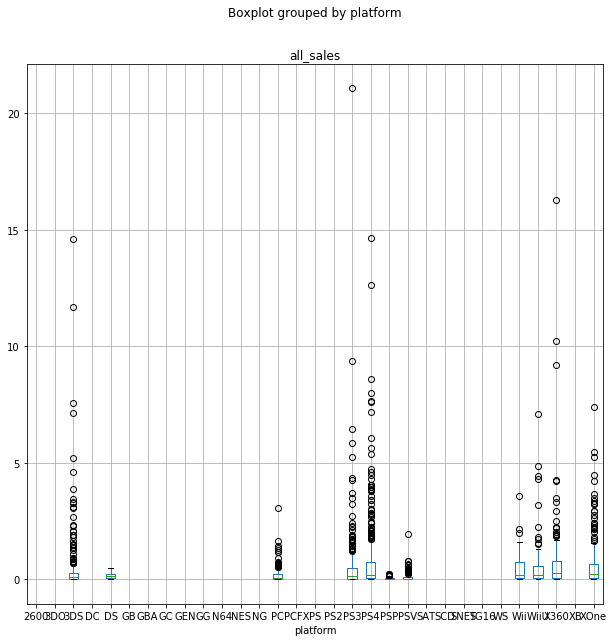

In [32]:
# Посмотрим как распределенны глобальные продажи в разрезе платформ по графике боксплот
plot = df2.boxplot('all_sales', by='platform',figsize=(10,10))
warnings.filterwarnings('ignore')

Ничего не видно. У части платформ очень большие выбросы сверху -  Wii, PS, PS3 и X360 отдельно
На данных платформ есть очень хорошо продаваемые игры, видимо хиты индустрии. Отмечаем для себя наличие таких хитов и для дальнейшего анализа смотрим без этих выбросов. Поставим произвольное ограничение в 5 млн копий. По графику видно, что самые значительные выбросы окажутся за этой чертой. 

In [33]:
df_for_boxplot = df2.loc[df['all_sales']<=5]

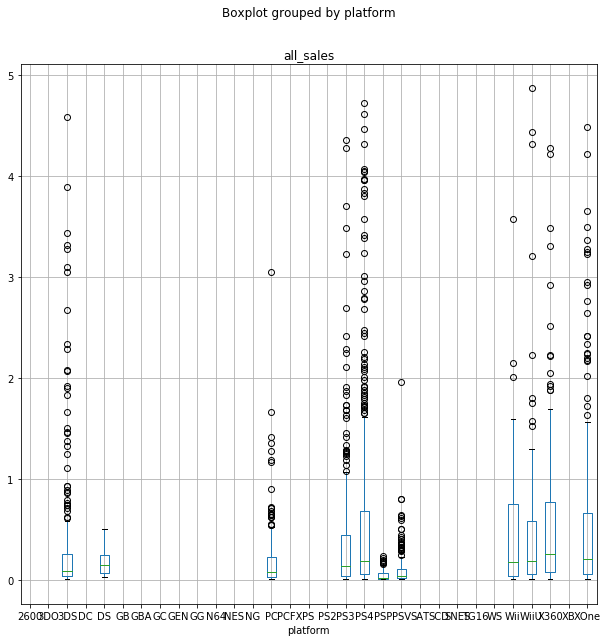

In [34]:
plot = df_for_boxplot.boxplot('all_sales', by='platform',figsize=(10,10))

По такому распределению можно сделать вывод что большая часть игр на всех платформах продается не более чем миллионом копий. Но для рынка игр характерно наличие большого количесво игр с гораздо большими продажами - большая часть выбросов лежит до границы в 20 миллионов копий. Отсюда можно сделать вывод, что выпускается большое количество средних игр и  только некоторые тановятся "культовыми". Так можно увидеть, что у некоторых платформ высота самого боксплота и его усов выше - это означает, что на таких платформах качество контента выше, так как в среднем случайная игра зарабатывает больше. К таким платформам можно отнести  PS3, PS4, XOne, X360

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Например ps4. Для этого отберем нужные данные

In [35]:
# Отбираем данные
df_for_corr = df2.loc[df['platform']=='PS4']
df_for_corr = df_for_corr[['critic_score','user_score','all_sales']]

In [36]:
# Уберем данные с нулями, что бы они не портили статистику
df_for_corr = df_for_corr.loc[df['critic_score'] !=0]
df_for_corr = df_for_corr.loc[df['user_score'] !=0]
# Считаем корреляцию
df_for_corr.corr()
# Видимо оценки не слишком влияю на продажи, а вот оценки критиков и игроков между собой очень даже связаны
# Но не забываем пропропуски, которые мы заполняли нулями. 
# Если нули есть и по оценки критиков и оценке игроков 0 это увеличивает корреляцию между ними

,critic_score,user_score,all_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
all_sales,0.405895,-0.033625,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8be16eed0>,
      dtype=object)

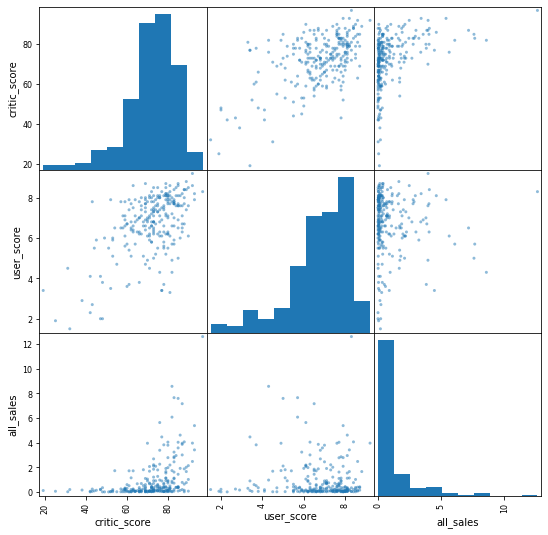

In [37]:
# Посмотрим наглядно взаимосвязь
pd.plotting.scatter_matrix(df_for_corr, figsize=(9, 9)) 
# Все-таки критики больше блияют на продажи, чем простые игроки

In [38]:
# Посмотрим в разрезе других платформ, например - X360

df_for_corr2 = df2.loc[df['platform']=='X360']
df_for_corr2 = df_for_corr[['critic_score','user_score','all_sales']]

# Уберем данные с нулями, что бы они не портили статистику
df_for_corr2 = df_for_corr.loc[df['critic_score'] !=0]
df_for_corr2 = df_for_corr.loc[df['user_score'] !=0]

df_for_corr2.corr()
# Довольно схожие цифры

,critic_score,user_score,all_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
all_sales,0.405895,-0.033625,1.000000


Перейдем к анализу игр по жанрам. Посмотрим для начала  на распределение жанров по прибыли

Text(0.5, 1.0, 'Суммарные продажи игр по жанрам, актуальный период')

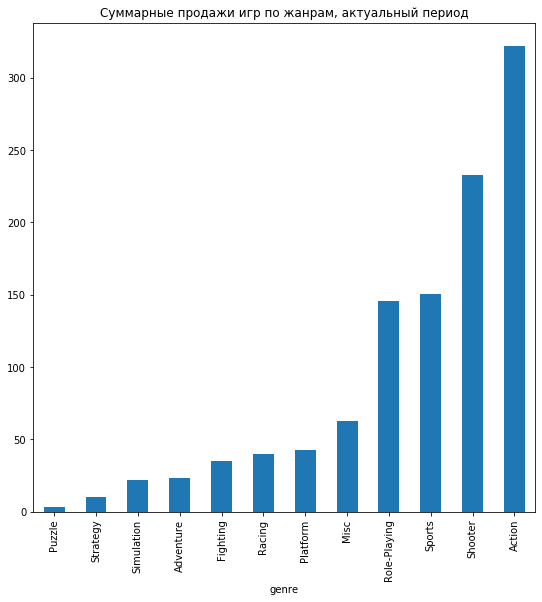

In [39]:
# Посмотрим на суммарные продажи
df2.groupby('genre')['all_sales'].sum().sort_values().plot(kind='bar',figsize = (9, 9))
plt.title('Суммарные продажи игр по жанрам, актуальный период')

Экш, спортивные игры и шутеры составляют тройку лидеров по суммарным продажам. Но в таком случае мы не видим прибыльность каждого жанра. Что бы сделать какие-то выводы нам нужно посмотреть на средние продажи по жанрам

Text(0.5, 1.0, 'Средние продажи игр по жанрам, актуальный период')

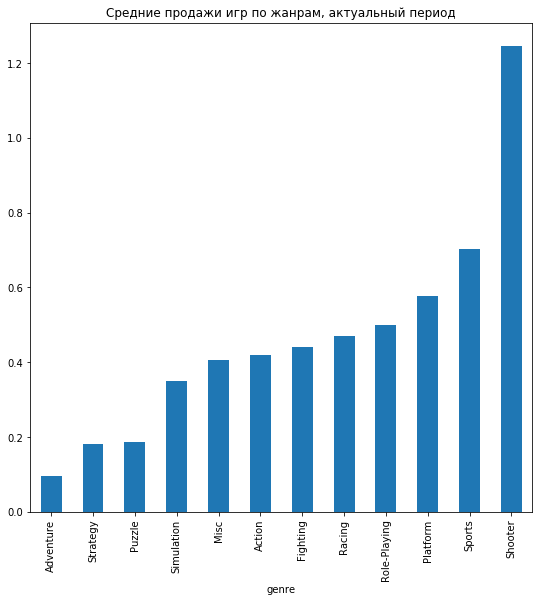

In [40]:
# Выведем также на график
df2.groupby('genre')['all_sales'].mean().sort_values().plot(kind='bar',figsize = (9, 9))
plt.title('Средние продажи игр по жанрам, актуальный период')                                                           

In [41]:
# Для сравнения посмотрим на эти показатели рядом
df2.pivot_table(index='genre', values='all_sales', aggfunc= {'all_sales':['sum','mean','count','median']}).sort_values(by = 'mean')

,count,mean,median,sum
genre,,,,
Adventure,245,0.096490,0.030,23.64
Strategy,56,0.180000,0.080,10.08
Puzzle,17,0.186471,0.060,3.17
Simulation,62,0.350968,0.100,21.76
Misc,155,0.405290,0.100,62.82
Action,766,0.420196,0.110,321.87
Fighting,80,0.441375,0.125,35.31
Racing,85,0.469294,0.120,39.89
Role-Playing,292,0.499623,0.125,145.89


На основании графиков и сводной таблицы можно сделать следущие выводы: Больше всего продается жанр экшн, однако в среднем каждая игра продается 0,47 млн копий, что не является выдающимся результатом. Очевидно жанр экшн берет количеством. Шутеры, платформы и спортивные игры в среднем продаются больше в расчете на одну игру. Шутеры занимают высокие позиции на обоих графиках - это самый продаваемых жанр. Самые непопулярные жанры по обоим критериям - приключения, стратегии и пазлы

# Шаг 4. Портрет пользователя по регионам

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

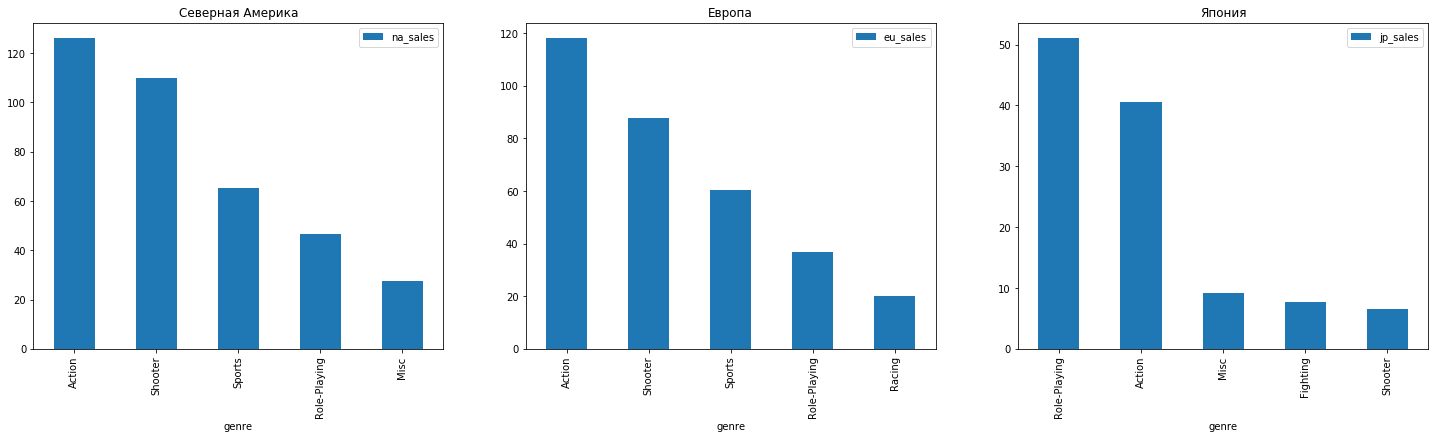

In [42]:
# Посмотрим на популярность платформ по суммарным продажам копий игр в регионах
fig, axes = plt.subplots(1, 3, figsize=(25,6))
df2.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales',ascending=False)[:5].plot(kind='bar',ax=axes[0], title = 'Северная Америка')
df2.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales',ascending=False)[:5].plot(kind='bar',ax=axes[1], title = 'Европа')
df2.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales',ascending=False)[:5].plot(kind='bar',ax=axes[2], title = 'Япония')


Можно сделать вывод о схожости продаж в Северной Америке и Европе. Четыре из пяти популярных жанра совпадают. А вот Япония отличается - вместо экшена японцы отдают предпочтения ролевым играм

In [43]:
# Посмотрим в цифрах
df2.groupby('genre').agg({'na_sales': 'sum','eu_sales': 'sum','jp_sales': 'sum'}).sort_values(by='na_sales',ascending=False)
# Продажи в Японии на порядок ниже

,na_sales,eu_sales,jp_sales
genre,,,
Action,126.05,118.13,40.49
Shooter,109.74,87.86,6.61
Sports,65.27,60.52,5.41
Role-Playing,46.40,36.97,51.04
Misc,27.49,20.04,9.20
Platform,18.14,15.58,4.79
Fighting,15.55,8.55,7.65
Racing,12.96,20.19,2.30
Adventure,7.14,8.25,5.82


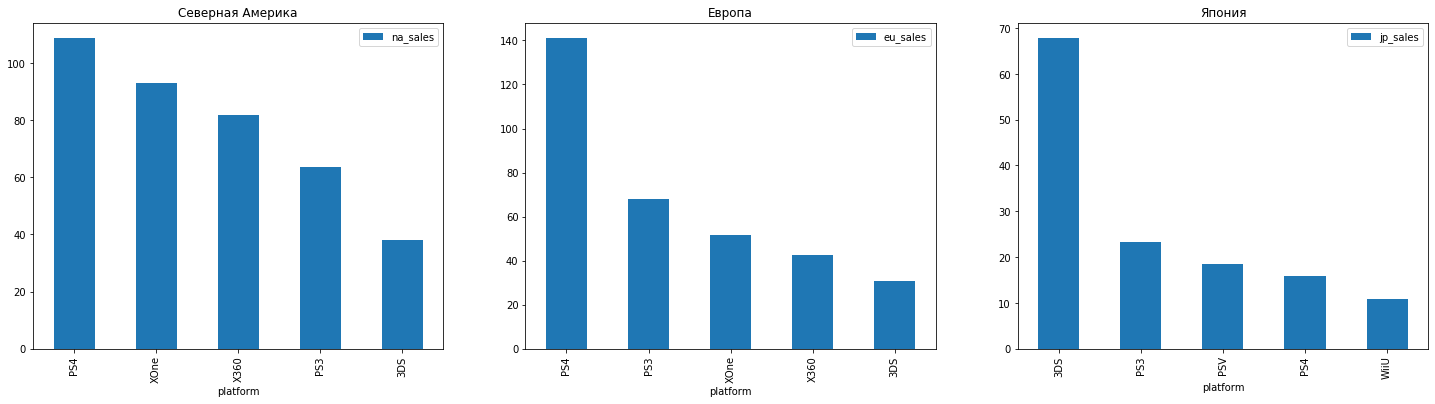

In [44]:
# Посмотрим на платформы
fig, axes = plt.subplots(1, 3, figsize=(25,6))
df2.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales',ascending=False)[:5].plot(kind='bar',ax=axes[0], title = 'Северная Америка')
df2.groupby('platform').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales',ascending=False)[:5].plot(kind='bar',ax=axes[1], title = 'Европа')
df2.groupby('platform').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales',ascending=False)[:5].plot(kind='bar',ax=axes[2], title = 'Япония')


In [45]:
df2.groupby('platform').agg({'na_sales': 'sum','eu_sales': 'sum','jp_sales': 'sum'}).sort_values(by='na_sales',ascending=False)

,na_sales,eu_sales,jp_sales
platform,,,
PS4,108.74,141.09,15.96
XOne,93.12,51.59,0.34
X360,81.66,42.52,0.51
PS3,63.50,67.81,23.35
3DS,38.20,30.96,67.81
WiiU,29.21,19.85,10.88
PC,11.11,25.36,0.00
Wii,6.56,5.93,0.05
PSV,5.04,6.10,18.59


Так в Северной Америке самая популярная платформа - x360, а в Европе ps3, однако в целом тройка лидеров схожа - x360,ps3,wii. А вот в Японии гораздо больше продаж приходится на ds и 3ds и только потом идет ps3, а x360 даже не входит в топ-5.

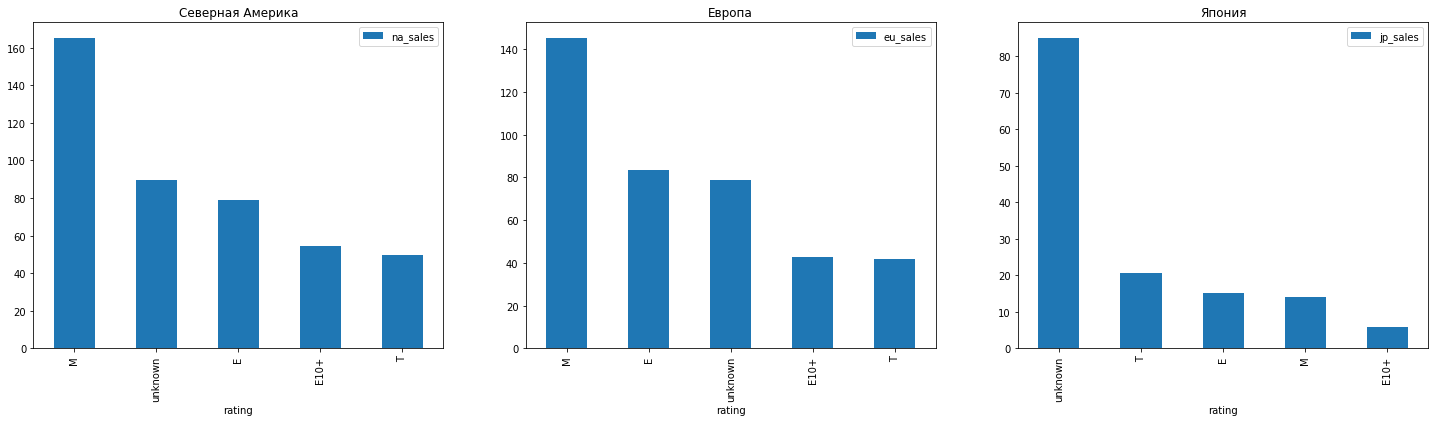

In [46]:
# Аналогично посмотрим на рейтинги
fig, axes = plt.subplots(1, 3, figsize=(25,6))
df2.groupby('rating').agg({'na_sales': 'sum'}).sort_values(by='na_sales',ascending=False)[:5].plot(kind='bar',ax=axes[0], title = 'Северная Америка')
df2.groupby('rating').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales',ascending=False)[:5].plot(kind='bar',ax=axes[1], title = 'Европа')
df2.groupby('rating').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales',ascending=False)[:5].plot(kind='bar',ax=axes[2], title = 'Япония')

Опять же в Северной Америке и Европе ситуация схожа - самые популярные рейтинги E, M и T. И ситуация в Японии отличается. На первом месте игры без рейтинга. Может в Японии не всем играм ставятся рейтинги? В любом случае однозначно можно сделать вывод, что средний портрет пользователя Северной Америки и Европы схож, а в Японии оотличается. Предположу, что на японском рынке продаются какие-то характерные игры, которые не выходят на остальной мир и рейтинг им не проставляется

# Шаг 5. Проверка гипотез

У нас есть две гипотезы. Для обех используем t-тест - st.ttest_ind, так как у нас выборки не зависимы друг от друга: пользователи разных платфор не зависят друг от друга также как и игроки в разные жанры

In [47]:
# Задаем стандартное значение альфа
alpha = 0.05

In [48]:
# Убирем нулевые рейтинги, что бы они нам не мешали и не оказывали влияния на тесты
df3 = df2[df2['user_score'] != 0]

5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой

In [49]:
# Создаем выборки для теста
X0ne = df3[df3['platform'] == 'XOne']['user_score']
PC = df3[df3['platform'] == 'PC']['user_score']

In [50]:
# Посмотрим, а на средние значения
print(X0ne.mean())
print(PC.mean())
# Пользовательская оценка игр на PC выше
# А теперь проверим не случайно ли это различие

6.521428571428572
6.2696774193548395


In [51]:
# Проводим сам тест
results = st.ttest_ind(X0ne, PC)

In [52]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Вывод: различия между пользовательскими оценками пользователей XOne и PC статистически значимы

5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров экшн и спорт одинаковые.
Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров экшн и спорт отличаются между собой

In [53]:
# Создаем выборки для теста
action = df3[df3['genre'] == 'Action']['user_score']
sports = df3[df3['genre'] == 'Sports']['user_score']

In [54]:
# Посмотрим на сами средние значения
print(action.mean())
print(sports.mean())
# Есть некоторое отличие в пользу экшн игр

6.837532133676092
5.238124999999999


In [55]:
# Проводим сам тест
results2 = st.ttest_ind(action, sports)

In [58]:
print('p-значение:', results2.pvalue)

if (results2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Различия в оценках случайно. Средние оценки игр экшн не отличаются от игр спорт

# Шаг 6. Вывод

Продажи игр развивались более 30 лет и уже пережили пик своей популярности в середине двухтысячных. На данный момент имеется тенденция к снижению объемов продаж игр. Можно прогнозировать дальнейший спад продаж. На рынке существует множество платформ они появляются, развиваются и затухают. В среднем для одной платформы на это требуется 10 лет. Одни платформы явно популярнее других - например, PS2,X360,PS3,Wii,DS,PS. Для каждой платформы выходят разнообразные игры разных жанров и разных рейтингов. Соответственно такие игры продаются с разной успешностью. Для продаж игр характерно большое наличие игр со средней оценкой, некое "штампование" продукта. Только отдельные игры-выбросы становятся действительно популярны и продаются большим числом копий. Однако некоторые платформы "устойчивее" и предлагают больше качественного контента -  PS3, PS4, XOne, X360. Игры могут получать оценки от критиков и игроков, однако большая часть игр не получает никаких оценок. Нет какой-либо влиятельной связи оценок на продажи, но есть довольно значимая взаимосвяь оценок между собой. Игры продаются на разных рынках. Успешнее всего в Северной Америке и Европе - игроки этих регионов схожи по предпочтениям в жанрах, рейтингах и платформах. Японски